In [34]:
# f(x) = y = x.s

# let s = 01101
for x0 in [0, 1]:
    for x1 in [0, 1]:
        for x2 in [0, 1]:
            for x3 in [0, 1]:
                for x4 in [0, 1]:
                    print(f"f({x0}, {x1}, {x2}) = {x1*1 ^ x2*1 ^ x4*1}")

f(0, 0, 0) = 0
f(0, 0, 0) = 1
f(0, 0, 0) = 0
f(0, 0, 0) = 1
f(0, 0, 1) = 1
f(0, 0, 1) = 0
f(0, 0, 1) = 1
f(0, 0, 1) = 0
f(0, 1, 0) = 1
f(0, 1, 0) = 0
f(0, 1, 0) = 1
f(0, 1, 0) = 0
f(0, 1, 1) = 0
f(0, 1, 1) = 1
f(0, 1, 1) = 0
f(0, 1, 1) = 1
f(1, 0, 0) = 0
f(1, 0, 0) = 1
f(1, 0, 0) = 0
f(1, 0, 0) = 1
f(1, 0, 1) = 1
f(1, 0, 1) = 0
f(1, 0, 1) = 1
f(1, 0, 1) = 0
f(1, 1, 0) = 1
f(1, 1, 0) = 0
f(1, 1, 0) = 1
f(1, 1, 0) = 0
f(1, 1, 1) = 0
f(1, 1, 1) = 1
f(1, 1, 1) = 0
f(1, 1, 1) = 1


In [35]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit.visualization import plot_distribution

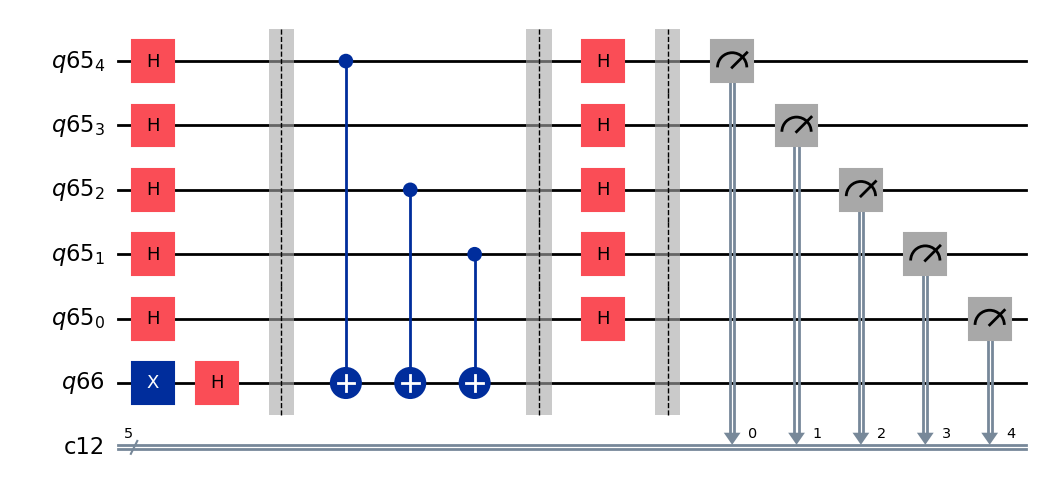

In [36]:
def u_f(qubits):

    qreg = QuantumRegister(qubits)
    areg = QuantumRegister(1)
    qc = QuantumCircuit(areg, qreg)

    # let s = "01101"
    qc.cx(qreg[4], areg)
    qc.cx(qreg[2], areg)
    qc.cx(qreg[1], areg)

    return qc


qubits = 5
qreg = QuantumRegister(qubits)
areg = QuantumRegister(1)
creg = ClassicalRegister(qubits)
qc = QuantumCircuit(areg, qreg, creg)

qc.h(qreg)
qc.x(areg)
qc.h(areg)
qc.barrier()

qc.compose(u_f(qubits), inplace=True)
qc.barrier()

qc.h(qreg)
qc.barrier()

qc.measure([*qreg][::-1], creg)

qc.draw(output="mpl", reverse_bits=True)

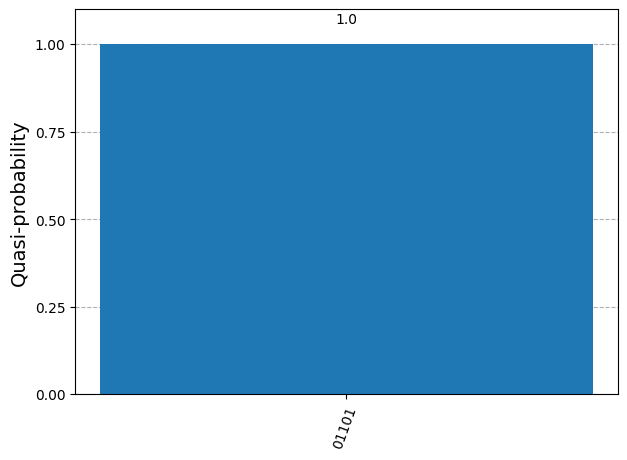

In [37]:
simulator = AerSimulator()
isa_circuit = transpile(qc, simulator)
result = simulator.run(isa_circuit).result()
counts = result.get_counts(isa_circuit)
plot_distribution(counts)